In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [34]:
file_path = '/content/survey.csv'

In [35]:
df = pd.read_csv(file_path)

In [36]:
print(df.head())

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

Printing the head of dataset to get a basical information.

In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

Here it seems that the only integer column is age, as it should be. But here we don't have the age grouped, that will be an obstacle to clean data, so we should change that column with several age groups.

In [38]:
print(df.describe())

                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11


It seems like all tha data in the column is correct

In [39]:
print("Dataset Shape:", df.shape)

Dataset Shape: (1259, 27)


Dataset isn't too huge, we don't need to opearate in chuncks or make a sample

In [40]:
print(df.isnull().sum())

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


We have a lot of missing values in comments - that is ok, also we have quite a lot of missing values in state and work_interfere columns. Let's decide, what to do with them.

In [41]:
columns_to_drop = ['Timestamp', 'comments', 'state', 'work_interfere', 'family_history', 'no_employees', 'remote_work', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', ]

In [42]:
df.drop(columns=columns_to_drop, inplace=True)

I decided to drop all the columns, irrelivant to the main questions asked, so we have to operate a smaller table and don't have to clean a lot of data and run analysis faster.

In [43]:
df['self_employed'].fillna('No', inplace=True)

Handling missing values in self_employed column with True, cause the ammount of missing values is insignificant. And it doesnt't change the picture, where almost 90% are not self-employed

In [44]:
df['Gender'] = df['Gender'].str.lower()

In [45]:
df['Gender'] = df['Gender'].replace({
    'male': 'M', 'm': 'M', 'male-ish': 'M', 'maile': 'M', 'mal': 'M', 'make': 'M',
    'female': 'F', 'f': 'F', 'woman': 'F', 'female (cis)': 'F',
})


In [57]:
df = df[df['Gender'].isin(['M', 'F'])]

Detecting and correcting inconsistencies in gender column. I decided to drop all the values, not to filter all the misprints

In [46]:
lowr_columns = ['Country']

In [58]:
for column in lowr_columns:
    df[column]=df[column].str.lower()

correcting inconsistencies in country columns

In [59]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 65)]

Filter out unrealistic ages

In [60]:
print(df.head())

   Age Gender         Country self_employed treatment tech_company
0   37      F   united states            No       Yes          Yes
1   44      M   united states            No        No           No
2   32      M          canada            No        No          Yes
3   31      M  united kingdom            No       Yes          Yes
4   31      M   united states            No        No          Yes


In [61]:
df1 = df.copy()

In [62]:
age_bins = [18, 25, 35, 45, 55, 65]

In [63]:
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-65']

In [64]:
df1['age_group'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels, right=False)


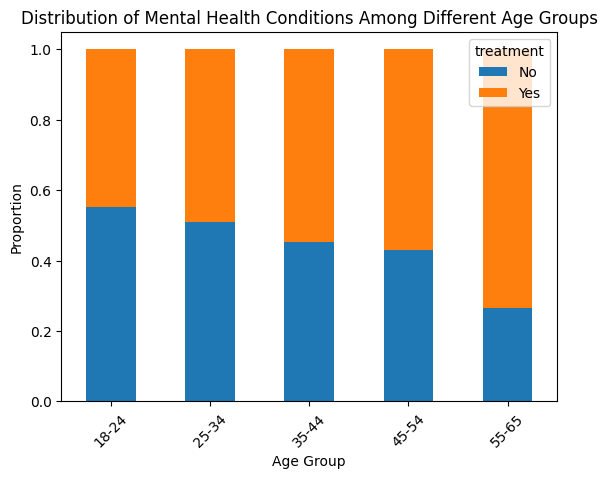

In [54]:
age_group_dist = df1.groupby('age_group')['treatment'].value_counts(normalize=True).unstack().fillna(0)
age_group_dist.plot(kind='bar', stacked=True)
plt.title('Distribution of Mental Health Conditions Among Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

We can see the positive corelation bitween the age group and distribution of meantal health conditions. We can see quite significant step for the oldest analysed group. It could be useful to lounch some internal communications or activities to help them.

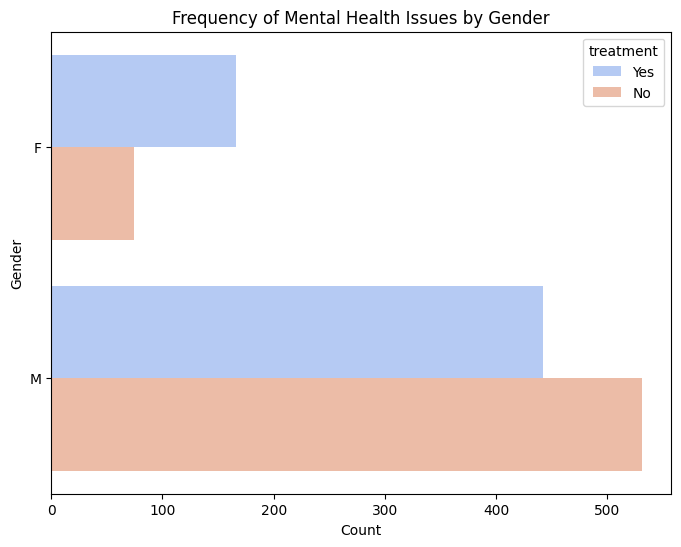

In [65]:
plt.figure(figsize=(8, 6))
gender_plot = sns.countplot(data=df1, y='Gender', hue='treatment', palette='coolwarm')
gender_plot.set_title('Frequency of Mental Health Issues by Gender')
gender_plot.set_xlabel('Count')
gender_plot.set_ylabel('Gender')
plt.show()

We can notice, that women complain on mental issues more often, but there is significant gender disbalance inside the industry, as we can also notice on that plot. It could be helpful to dive in-depth on is there a correlation or not. Cause women tipycally pay more attention to their emotions and inner voice.

In [66]:
country_treatment = df1.groupby('Country')['treatment'].value_counts(normalize=True).unstack().fillna(0)
top_countries = country_treatment['Yes'].sort_values(ascending=False).head(10)
bottom_countries = country_treatment['Yes'].sort_values(ascending=True).head(10)

In [67]:
print(top_countries)

Country
japan            1.000000
croatia          1.000000
slovenia         1.000000
moldova          1.000000
denmark          1.000000
south africa     0.666667
new zealand      0.625000
australia        0.619048
poland           0.571429
united states    0.546335
Name: Yes, dtype: float64


Top 10 Countries with Highest Reported Rates of Mental Health Issues

In [68]:
print(bottom_countries)

Country
italy          0.0
thailand       0.0
spain          0.0
russia         0.0
romania        0.0
portugal       0.0
philippines    0.0
norway         0.0
nigeria        0.0
latvia         0.0
Name: Yes, dtype: float64


Top 10 Countries with Lowest Reported Rates of Mental Health Issues